# Pandas 외부 파일 다루기

1. 텍스트 파일
1. 엑셀파일


파일 `pandas_외부자료_data.zip` :

    - '주요발생국가주간동향(4월2째주).csv'
    - 'kto_201901.xlsx'
    - 'nba.csv'
    - '행정구역_읍면동_별_5세별_주민등록인구_2011년__20220622170418.xlsx'

In [ ]:
#-*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


# 1. 텍스트 파일

 - csv, tsv, txt, json 등의 텍스트 형식

## `read_csv()` 

[pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) 



주요 파라미터:

 - `engine=` 옵션: 'c','python'. 파서 엔진으로 C엔진이 빠르다. python 엔진은 기능이 더 완전하다.
 - `parse_date=`: boolean or list of ints or names or list of lists or dict, default False
     - True면 index 파싱. 리스트를 묶어 하나로 파싱한다.

In [ ]:
df = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv')
df.head()

In [ ]:
# 국가를 index
df = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv', index_col=0)
df.head()

In [ ]:
df.index

In [ ]:
df.values

### nba.csv

In [ ]:
# - Data_Analysis_with_Pandas_Python 의 샘플
# nba = pd.read_csv('https://raw.githubusercontent.com/sivabalanb/Data-Analysis-with-Pandas-and-Python/master/nba.csv')

In [ ]:
nba = pd.read_csv('data/nba.csv')

nba.head(3)

나이와 몸무게를 출력

In [ ]:
nba[['Age', 'Weight']].plot()

In [ ]:
nba.tail()

전체 크기, 컬럼 이름, 

In [ ]:
nba.index

In [ ]:
nba.shape

In [ ]:
nba.columns

In [ ]:
nba.axes

In [ ]:
nba.info()

In [ ]:
nba.dtypes

In [ ]:
type(nba.values)

In [ ]:
nba.values

보유한 데이터의 형식별 숫자

In [ ]:
# 0.25 Deprecated
# counts of data types: nba.get_dtype_counts()

# ex) Index 조회

In [ ]:
nba.index

In [ ]:
nba.loc[300]

In [ ]:
nba.iloc[0]

#### ex) Index 와 column 동시 조회

In [ ]:
nba.loc[200][['Age','Weight']]

#### ex) 조건 조회

- info
- describe
- shape, ndim......

조건
 - Age > 26
 - Team == Utah Jazz & Salary > 900000
 

In [ ]:
nba[(nba.Team == "Utah Jazz") & (nba.Salary > 900000)]

In [ ]:
nba[ (nba['Age'] > 30) & (nba['Weight'] > 100)]

In [ ]:
nba[ (nba['Age'] > 30) & (nba['Weight'] > 100)].plot()

### 'UTF-8" encoding 에러



encoding 을 unicode_escape 로 지정해 사용 가능하다.

In [ ]:
# example
pd.read_csv('https://github.com/myeonghak/Recsys_MF_example/raw/master/ecommerce_data.csv')

### ex) 다음 링ㅋ의 과정을 위 nba 자료로 수행해 보자.

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

# 2. Excel 파일

외부 데이터 파일 xls, xlsx 사용

 - pandas 사용
 - openpyxl 설치
 - xlrd 설치

####  openpyxl 과 xlrd

openpyxl 은 Excel 2010 xlsx/xlsm/xltx/xltm 파일을 읽고/쓰기가 가능하다.

 - https://pypi.org/project/openpyxl/ 
 
```Shell
pip install -U openpyxl xlrd

conda install -c anaconda openpyxl  xlrd
```

In [ ]:
! pip install openpyxl xlrd

## `read_excel()` 

[pandas.read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) 


주요 파라미터:

 - `sheet_name=` : 워크시트 이름
 - `engine=`:  “xlrd”, “openpyxl”, “odf”, “pyxlsb"
 - `parse_date=`: boolean or list of ints or names or list of lists or dict, default False
     - True면 index 파싱. 리스트를 묶어 하나로 파싱한다.

### xls 파일

In [ ]:
seouppop = pd.read_excel('../data/seoul_pop_22Q4Report.xls')
seouppop.head(3)

### xlsx 파일

In [ ]:
foreign_201901 = pd.read_excel('../data/kto_201901.xlsx', 
                          header=1,
                          usecols='A:G',
                          skipfooter=4)

foreign_201901.head()

## 경고 / 에러

### no default style

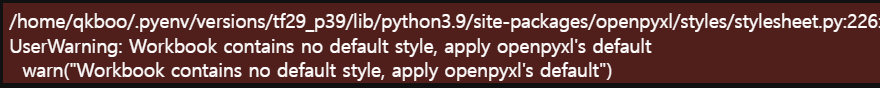

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('../data/행정구역/행정구역_읍면동_별_5세별_주민등록인구_2011년__20220622170418.xlsx', header=1)

In [ ]:
import openpyxl as opyxl

load_wb = opyxl.load_workbook('../data/행정구역/행정구역_읍면동_별_5세별_주민등록인구_2011년__20220622170418.xlsx',
                              data_only=True)
population = load_wb['데이터']

경고는 openpyxl 을 기본으로 사용하라는 의미로 아래 같이 엔진을 지정하면 된다.

In [ ]:
df = pd.read_excel('../data/행정구역/행정구역_읍면동_별_5세별_주민등록인구_2011년__20220622170418.xlsx', 
                   header=1,
                   engine="openpyxl")

# 3. 화면 옵션

In [ ]:
pd.set_option('display.float_format', '{:.3}'.format)  # exponent 표현
pd.options.display.float_format = '{:.2f}'.format

## Tqdm Pandas Integrations

- https://github.com/tqdm/tqdm/#pandas-integration

### IPython/Jupyter Integration

 - https://github.com/tqdm/tqdm/#table-of-contents
 
IPython/Jupyter is supported via the tqdm.notebook submodule:

In [ ]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)
        

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm.gui.tqdm`, `tqdm.notebook.tqdm`, optional kwargs, etc.)
tqdm.pandas(desc="my bar!")

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
# df.groupby(0).progress_apply(lambda x: x**2)

# 참고
 - 도서 *Data_Analysis_with_Pandas_Python* , Pandas 로 데이터를 다루는 예
 - https://bitbucket.org/hrojas/learn-pandas

